In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns


In [2]:
df_train= pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


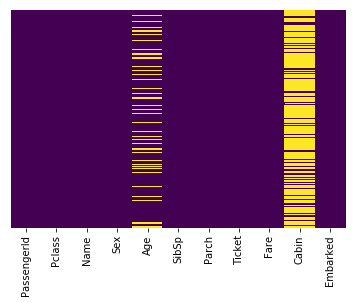

In [6]:
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
df_train = df_train.drop(["Cabin"], axis=1)
df_test = df_test.drop(["Cabin"], axis=1)

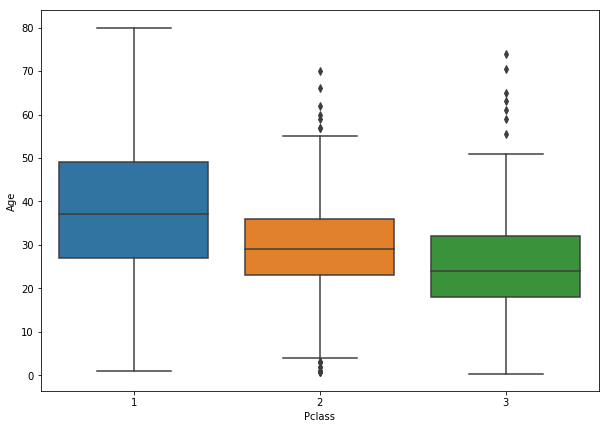

In [8]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=df_train)

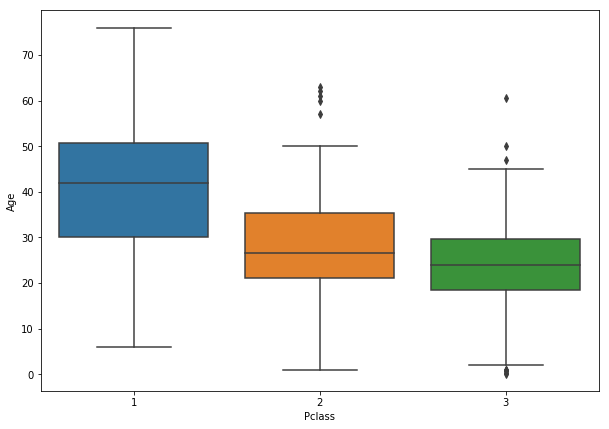

In [9]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=df_test)

In [10]:
def impute_age_train(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    
    else:
        return Age

In [11]:
def impute_age_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 43
        elif Pclass == 2:
            return 28
        else:
            return 25
    
    else:
        return Age

In [12]:
df_train['Age'] = df_train[['Age', 'Pclass']].apply(impute_age_train, axis=1)
df_test['Age'] = df_test[['Age', 'Pclass']].apply(impute_age_test, axis=1)

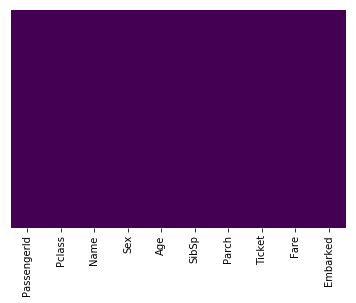

In [13]:
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [14]:
df_test.groupby(['Pclass']).mean()

,PassengerId,Age,SibSp,Parch,Fare
Pclass,,,,,
1,1098.224299,41.093458,0.476636,0.383178,94.280297
2,1117.935484,28.735699,0.376344,0.344086,22.202104
3,1094.178899,24.348991,0.463303,0.417431,12.459678


In [15]:
df_test[df_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [16]:
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
df_train.dropna(inplace=True)

In [18]:
sex_train= pd.get_dummies(df_train['Sex'], drop_first=True)
sex_test= pd.get_dummies(df_test['Sex'], drop_first=True)

In [19]:
Embark_train = pd.get_dummies(df_train['Embarked'], drop_first=True)
Embark_test = pd.get_dummies(df_test['Embarked'], drop_first=True)

In [20]:
pclass_train = pd.get_dummies(df_train['Pclass'], drop_first=True)
pclass_test = pd.get_dummies(df_test['Pclass'], drop_first=True)

In [21]:
df_train = pd.concat([df_train, sex_train, Embark_train, pclass_train], axis = 1)
df_test = pd.concat([df_test, sex_test, Embark_test, pclass_test], axis = 1)

In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
2              418 non-null uint8
3              418 non-null uint8
dtypes: float64(2), int64(4), object(4), uint8(5)
memory usage: 34.8+ KB


In [23]:
df_train.drop(['Pclass', 'Name', 'Ticket', 'Sex', 'Embarked', 'PassengerId' ], axis= 1, inplace=True)
df_test.drop(['Pclass', 'Name', 'Ticket', 'Sex', 'Embarked', 'PassengerId' ], axis= 1, inplace=True)

#Model building

In [3]:
X_train = df_train.drop('Survived',axis=1)     
y_train = df_train['Survived']


NameError: name 'df_train' is not defined

In [2]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [26]:

predictions = lr.predict(df_test)

In [37]:
model_score = lr.score(X_train, y_train)
print(model_score)

0.8098987626546682


In [27]:
predictions = pd.DataFrame(predictions)
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 1 columns):
0    418 non-null int64
dtypes: int64(1)
memory usage: 3.3 KB


#preparing the final outcome

In [ ]:
df_test2= pd.read_csv('test.csv')
df_test2.drop(['Cabin', 'Age' ], axis= 1, inplace=True)

In [ ]:
df_test2.dropna(inplace=True)
df_test2.info()

In [ ]:
df_Final = pd.concat([df_test2, predictions], axis=1)
df_Final.head()

In [ ]:
df_Final.drop(['Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Embarked' ], axis= 1, inplace=True)
df_Final.drop(['Fare' ], axis= 1, inplace=True)
df_Final.head()

In [34]:
df_Final.to_csv("Predictions.csv", index=False)

In [ ]:
#For future reference, we can prepare the output dataset directly
#output = pd.DataFrame({'PassengerId':df_test.passengerId, 'Survived'= Predictions})

